# AI in Finance Project
Option 3:
Explain and extend a case model in:
Machine Learning and Data Science Blueprints for finance by Tatsat. Usually these systems predict a single asset (price or volatility related). Use: White Reality Check for evaluating the results

Chapter 5 Supervised learning: Regression :case study 1: Stock price prediction



## 1.0 Introduction
Similarly to what has been done in the Tatsat case, in this case study, we use the return of the Microsoft stock as the predicted variable, but instead of weekly return, we use hourly return to make our data more plentiful. We would like to find out the features which affect the Microsoft stock price and fit a good model to provide good prediction. 

In this case study, we used the following stocks, currency and indices:

*   Stocks: IBM (IBM) and Alphabet (GOOGL), MICROSOFT OHLC
*   Currency: USD/JPY (fxy(ETF)) and GBP/USD (fxb(ETF)) 
*   Indices: S&P 500 (spy(ETF)), Dow Jones (dia(ETF)) and VIX (vixy(ETF))

The time period we chose: Jan 1, 2018 - Dec 31, 2018

Frequency of the data: hourly



## 2.0 Load Packages and Data
### 2.1 Import Relevant Packages


Packages used throughout the programing of the cases are imported in the below section. We used Google Colab to run our codes.

In [29]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
import talib as ta

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3645    0  3645    0     0  48600      0 --:--:-- --:--:-- --:--:-- 48600
100  503k  100  503k    0     0  2053k      0 --:--:-- --:--:-- --:--:-- 2053k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3665    0  3665    0     0  50902      0 --:--:-- --:--:-- --:--:-- 50902
100  406k  100  406k    0     0  1954k      0 --:--:-- --:--:-- --:--:-- 6890k


In [30]:
!pip install phik

In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import fAux

#LinearSVR and LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC
import pywt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import TimeSeriesSplit

#Check and Test
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer 
from sklearn.inspection import permutation_importance
import detrendPrice 
import WhiteRealityCheckFor1 
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import accuracy_score
from scipy.special import ndtr
from phik.report import plot_correlation_matrix


### 2.2 Import Data

Data used in this case are downloaded from WRDS as per the instruction on Quercus. We used the WRDSHourlyDataProcessing_OPEN.py, WRDSHourlyDataProcessing_HIGH.py,WRDSHourlyDataProcessing_LOW.py and WRDSHourlyDataProcessing.py which are posted on Quercus to process our data to hourly data. 

In [32]:
# load data
df_g = pd.read_csv('GOOGLE_result.csv',index_col=0)
df_m = pd.read_csv('MSFT_result.csv',index_col=0)
df_i = pd.read_csv('IBM_result.csv',index_col=0)
df_fxy = pd.read_csv('fxy_result.csv',index_col=0)
df_fxb = pd.read_csv('fxb_result.csv',index_col=0)
df_spy = pd.read_csv('SPY_result.csv',index_col=0)
df_dia = pd.read_csv('dia_result.csv',index_col=0)
df_vixy = pd.read_csv('vixy_result.csv',index_col=0)
df_m_h = pd.read_csv('MSFT_HIGH.csv',index_col=0)
df_m_l = pd.read_csv('MSFT_LOW.csv',index_col=0)
df_m_o = pd.read_csv('MSFT_OPEN.csv',index_col=0)
# index 
df_g.index = pd.to_datetime(df_g.index)
df_m.index = pd.to_datetime(df_m.index)
df_i.index = pd.to_datetime(df_i.index)
df_fxy.index = pd.to_datetime(df_fxy.index)
df_fxb.index = pd.to_datetime(df_fxb.index)
df_spy.index = pd.to_datetime(df_spy.index)
df_dia.index = pd.to_datetime(df_dia.index)
df_vixy.index = pd.to_datetime(df_vixy.index)
df_m_h.index = pd.to_datetime(df_m_h.index)
df_m_l.index = pd.to_datetime(df_m_l.index)
df_m_o.index = pd.to_datetime(df_m_o.index)
# join data 
df = df_g.join(df_m, how="outer")
df = df.join(df_i, how="outer")
df = df.join(df_fxy, how="outer")
df = df.join(df_fxb, how="outer")
df = df.join(df_spy, how="outer")
df = df.join(df_dia, how="outer")
df = df.join(df_vixy, how="outer")
df = df.join(df_m_h, how="outer")
df = df.join(df_m_l, how="outer")
df = df.join(df_m_o, how="outer")
df = df.fillna(method='ffill')

#Add Talib features
n=5
close = df.loc[:, 'MSFT_PRICE']
high = np.array(df['MSFT_HIGH'])
low = np.array(df['MSFT_LOW'])
df['RSI'] = ta.RSI(np.array(close), timeperiod=n)
df['SMA'] = close.rolling(window=n).mean()
df['Corr']= close.rolling(window=n).corr(df['SMA'])
df['SAR']=ta.SAR(np.array(high),np.array(low), 0.2,0.2)
df.fillna(0, inplace=True)

### 2.3 Build Dataset
The return period we are using in this case is 1. X and Y used are presented below.

In [33]:
# return period
return_period = 1
# define Y
Y = np.log(df.loc[:, 'MSFT_PRICE']).diff(return_period).shift(-return_period)
Y.name = Y.name+'_pred'
# define X
X1 = np.log(df.loc[:, ('GOOGLE_PRICE', 'IBM_PRICE')]).diff(return_period)
X2 = np.log(df.loc[:, ('fxy_PRICE', 'fxb_PRICE')]).diff(return_period)
X3 = np.log(df.loc[:, ('SPY_PRICE', 'dia_PRICE', 'vixy_PRICE')]).diff(return_period)
X4 = pd.concat([np.log(df.loc[:, 'MSFT_PRICE']).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X5 = np.log(df.loc[:, ('MSFT_HIGH', 'MSFT_LOW', 'MSFT_OPEN')]).diff(return_period)
X6 = df.loc[:, ('RSI','SMA','Corr','SAR')]
# concat
X = pd.concat([X1,X2,X3,X4,X5], axis=1)

Build together the dataset of this case.

In [34]:
dataset = pd.concat([Y, X, df.loc[:, 'MSFT_PRICE']], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]
msft_price = dataset.loc[:, 'MSFT_PRICE'] 
retFut1 = msft_price.pct_change(1).shift(-1).fillna(0) #Save for White Reality Check
dataset = dataset.drop(['MSFT_PRICE'],axis=1)

## 3.0 Data Visualization
### 3.1 Descriptive Statistics

The descriptive statistics of our dataset are presented below.

In [35]:
pd.set_option('precision', 3)
dataset.describe()

,MSFT_PRICE_pred,GOOGLE_PRICE,IBM_PRICE,fxy_PRICE,fxb_PRICE,SPY_PRICE,dia_PRICE,vixy_PRICE,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT_HIGH,MSFT_LOW,MSFT_OPEN
count,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03,4.245e+03
mean,3.987e-05,-5.954e-06,-7.188e-05,4.532e-06,-1.564e-05,-1.699e-05,-1.441e-05,1.290e-04,3.998e-05,1.205e-04,2.402e-04,4.757e-04,3.962e-05,4.445e-05,4.030e-05
std,4.378e-03,4.721e-03,3.880e-03,1.072e-03,1.351e-03,2.723e-03,2.947e-03,1.448e-02,4.378e-03,7.322e-03,1.033e-02,1.452e-02,7.343e-03,1.329e-02,4.703e-03
min,-3.152e-02,-5.253e-02,-5.965e-02,-9.730e-03,-1.774e-02,-2.594e-02,-2.574e-02,-2.270e-01,-3.152e-02,-4.919e-02,-5.753e-02,-6.667e-02,-8.067e-02,-3.603e-01,-5.055e-02
25%,-1.312e-03,-1.648e-03,-1.354e-03,-1.116e-04,-7.410e-05,-8.418e-04,-9.451e-04,-4.925e-03,-1.312e-03,-2.606e-03,-4.082e-03,-6.521e-03,-1.269e-03,-1.654e-03,-1.388e-03
50%,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,3.711e-05,0.000e+00,0.000e+00,0.000e+00,2.837e-04,8.284e-04,1.342e-03,0.000e+00,0.000e+00,0.000e+00
75%,1.624e-03,1.768e-03,1.285e-03,0.000e+00,3.964e-06,9.737e-04,1.076e-03,3.650e-03,1.624e-03,3.346e-03,5.305e-03,8.253e-03,1.489e-03,1.767e-03,1.662e-03
max,3.445e-02,3.498e-02,3.176e-02,1.109e-02,1.279e-02,2.489e-02,2.637e-02,2.736e-01,3.445e-02,4.223e-02,5.954e-02,7.632e-02,8.669e-02,3.508e-01,5.066e-02


In [36]:
dataset.head()

,MSFT_PRICE_pred,GOOGLE_PRICE,IBM_PRICE,fxy_PRICE,fxb_PRICE,SPY_PRICE,dia_PRICE,vixy_PRICE,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT_HIGH,MSFT_LOW,MSFT_OPEN
DATETIME_simple,,,,,,,,,,,,,,,
2018-01-02 16:00:00,-0.001,-2.152e-04,-1.297e-04,2.340e-04,0.0,-1.116e-04,4.032e-05,-2.242e-03,4.655e-04,2.388e-03,-5.234e-04,4.665e-03,-8.139e-04,1.836e-02,2.156e-03
2018-01-02 17:00:00,0.001,-2.703e-04,3.301e-03,0.000e+00,0.0,-5.210e-04,-1.089e-03,-8.981e-04,-1.164e-03,1.515e-03,1.676e-03,-1.048e-03,0.000e+00,1.399e-03,4.655e-04
2018-01-02 18:00:00,0.000,3.541e-04,-1.681e-03,0.000e+00,0.0,-7.445e-05,1.089e-03,3.140e-03,1.164e-03,4.655e-04,4.408e-03,4.548e-03,-2.327e-04,5.822e-04,-1.164e-04
2018-01-02 19:00:00,0.000,6.520e-04,-3.237e-04,0.000e+00,0.0,4.466e-04,4.032e-05,0.000e+00,0.000e+00,0.000e+00,2.388e-03,5.819e-04,5.816e-04,0.000e+00,1.164e-04
2018-01-02 20:00:00,0.004,0.000e+00,0.000e+00,0.000e+00,0.0,1.488e-04,-4.032e-05,0.000e+00,0.000e+00,1.164e-03,2.680e-03,1.164e-04,0.000e+00,0.000e+00,0.000e+00


### 3.2 Visualization by Plots

Shown by histogram:

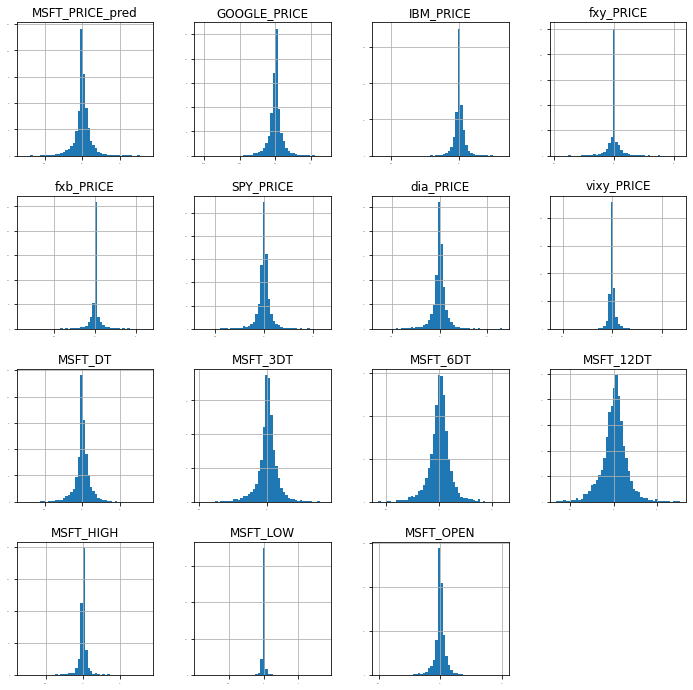

In [37]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

Shown by density:

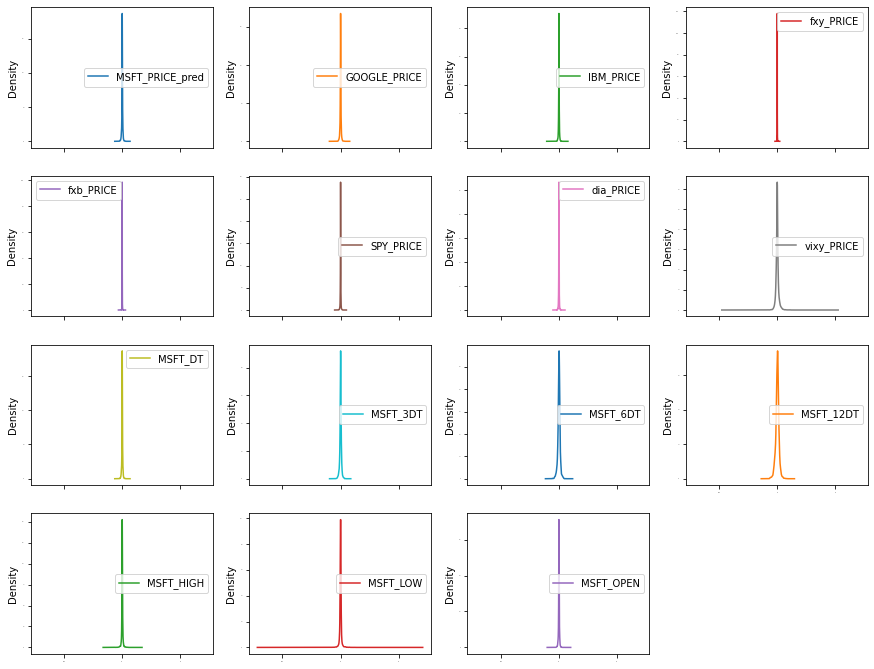

In [38]:
dataset.plot(kind='density', subplots=True, layout=(5,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

Shown by correlation matrix:



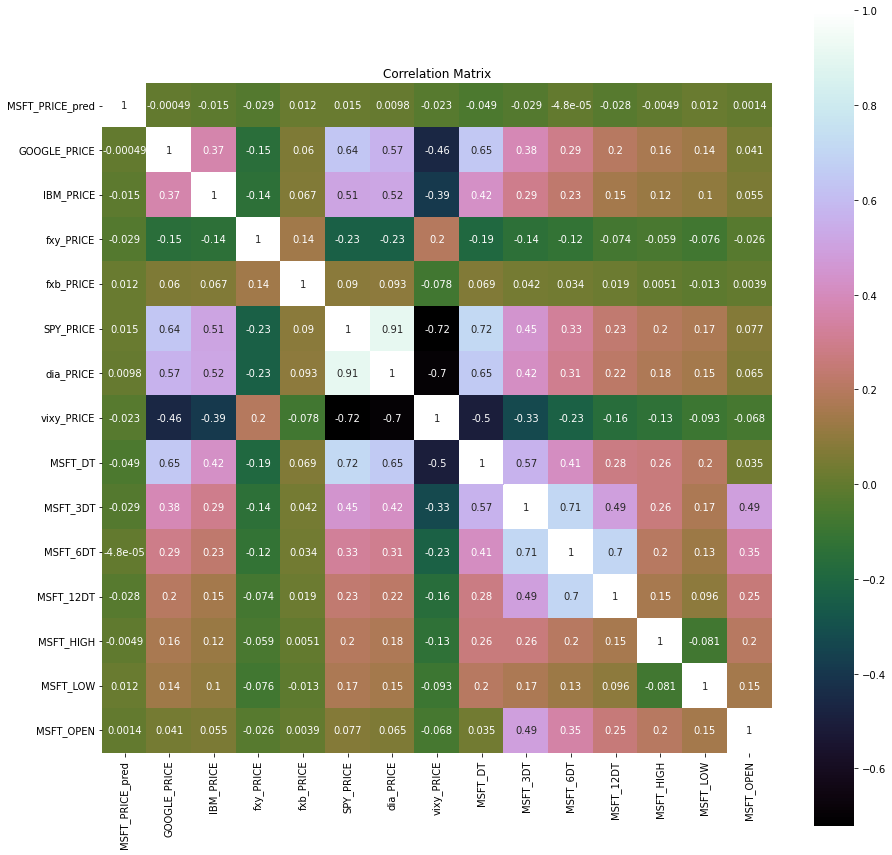

In [39]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Shown by scatter plot:

<Figure size 1296x1296 with 0 Axes>

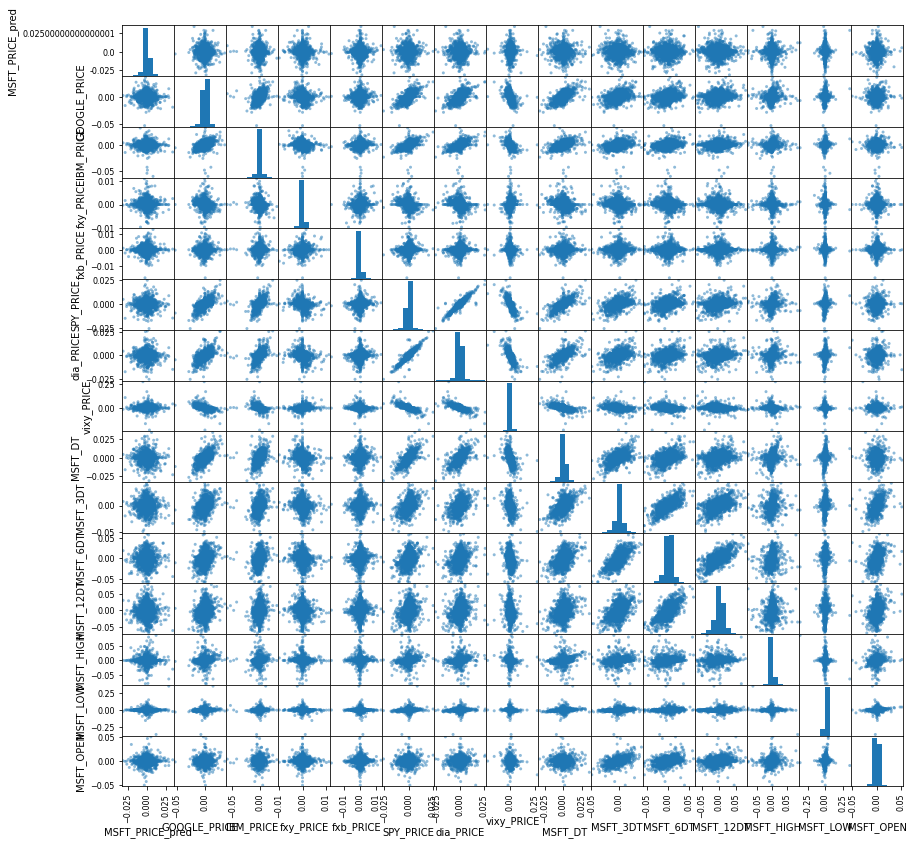

In [40]:
pyplot.figure(figsize=(18,18))
scatter_matrix(dataset,figsize=(14,14))
pyplot.show()

## 4.0 Data Preparation

### 4.1 Feature Selection

In [41]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # name the columns
featureScores.nlargest(10,'Score').set_index('Specs')  # show 10 best features

,Score
Specs,
MSFT_DT,10.209
MSFT_3DT,3.670
fxy_PRICE,3.631
MSFT_12DT,3.358
vixy_PRICE,2.239
SPY_PRICE,0.939
IBM_PRICE,0.924
fxb_PRICE,0.650
MSFT_LOW,0.644


In [42]:
cols = bestfeatures.get_support(indices=True)
X_new = X.iloc[:,cols]

From the above results, we see that MSFT_DT, MSFT_3DT, fxy, MSFT_12DT, vixy seems to be quite important, while dia is the least important. 

## 5.0 Models and Algorithms Analysis

### 5.1 Train Test Split

In [43]:
# validatuon size
validation_size = 0.2
# train size
train_size = int(len(X) * (1-validation_size))
# train test split
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]
retFut1_train, retFut1_test = retFut1[0:train_size], retFut1[train_size:len(X)]

### 5.2 Models and Algorithms Comparison

Preparations for using k-fold cross-validation:

In [44]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error' 

Regression and Tree Regression:

In [45]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('LinearSVR', LinearSVR()))

Neural Network:

In [46]:
models.append(('MLP', MLPRegressor()))

Ensemble:

In [47]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

All the models above have been successfully appended, k-fold cross-validation is provided below, as well as the model on the train and test period.

In [48]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds)
    # converted mean square error to positive, lower results are better
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Train period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.000015 (0.000008) 0.000015 0.000037
LASSO: 0.000015 (0.000008) 0.000015 0.000037
EN: 0.000015 (0.000008) 0.000015 0.000037
KNN: 0.000017 (0.000009) 0.000011 0.000041
CART: 0.000030 (0.000014) 0.000000 0.000061
LinearSVR: 0.000015 (0.000008) 0.000016 0.000038
MLP: 0.000015 (0.000008) 0.000015 0.000036
ABR: 0.000018 (0.000008) 0.000015 0.000039
GBR: 0.000016 (0.000009) 0.000010 0.000039
RFR: 0.000016 (0.000008) 0.000002 0.000039
ETR: 0.000016 (0.000008) 0.000000 0.000040


Algorithm comparison of k-fold results is shown as below: 

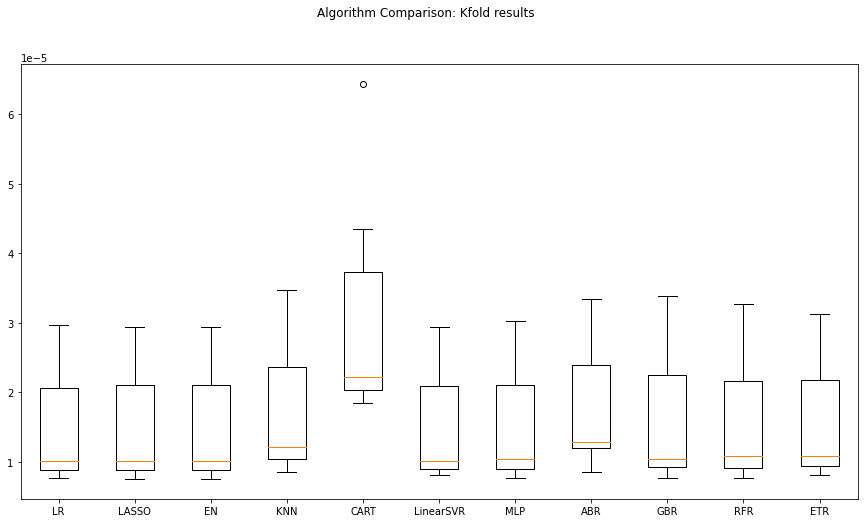

In [49]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results') # title of figure
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results) # boxplot
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

Comparisons of train and test error are provide below:

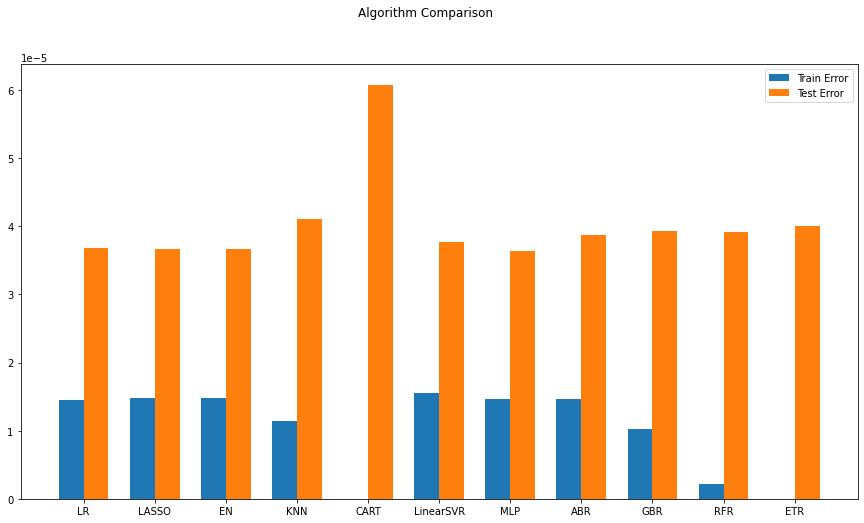

In [50]:
# plot to compare algorithms
fig = pyplot.figure()
# x locations for the groups
ind = np.arange(len(names))
width = 0.35  # the width of the bars
# title of the plot
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error') # train error
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error') # test error
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

Examining the training and test error, we could see a stronger performance from the linear models. Among the linear models, linear SVM regression seems to perform best. Linear SVMs are also more robust (not as vulnerable to outliers) and faster trainers, so we select LinearSVR for further model tuning and compare it with LinearSVC, in order to make a comparison between regression and classification.

## 6.0 LinearSVR & LinearSVC

In this section, LinearSVR, LinearSVC and LinearSVC with wavelets are defined and tested to provide comparison between LinearSVR and LinearSVC, as well as comparison between LinearSVC with and without wavelets. 

### 6.1 LinearSVR

LinearSVR model is defined below:

In [51]:
# define LinearSVR
svr_Linear = LinearSVR(max_iter=6000)

PCA, StandardScalar, ColumnTransformer are used as per below:

In [52]:
# define PCA and scalar
pca = PCA()
scaler_LinearSVR = StandardScaler(with_mean=True, with_std=True)
myscorer_LinearSVR = None

In [53]:
numerical_ix_LinearSVR = X_train.select_dtypes(include=['float64']).columns
t_LinearSVR = [('pca', pca, numerical_ix_LinearSVR)]
col_transform_LinearSVR = ColumnTransformer(transformers=t_LinearSVR, remainder='passthrough')

Pipeline is as follows:

In [54]:
# Pipeline
pipe_LinearSVR = Pipeline([('scaler',scaler_LinearSVR), ('pca', pca), ('svr', svr_Linear)])
scales_rs_LinearSVR = [{'scale': .5},{'scale': .1}]
c_rs_LinearSVR = np.linspace(0.0001, 1, num=8, endpoint=True)
s_LinearSVR = np.std(Y_train.values)
epsilon_rs_LinearSVR = [0, s_LinearSVR*.25, s_LinearSVR*.5, s_LinearSVR*.75, s_LinearSVR]
ncomponents_rs_LinearSVR = list(range(10,X_test.shape[1]))

Grid search is performed:

In [55]:
param_grid_LinearSVR = [{'pca__n_components':ncomponents_rs_LinearSVR, 'svr__C': c_rs_LinearSVR, 'svr__epsilon': epsilon_rs_LinearSVR}]
grid_search_LinearSVR = GridSearchCV(pipe_LinearSVR, param_grid_LinearSVR, cv=5, scoring=myscorer_LinearSVR, return_train_score=True, n_jobs = -1)
grid_search_LinearSVR.fit(X_train, Y_train)
best_parameters_LinearSVR = grid_search_LinearSVR.best_params_
best_model_LinearSVR = grid_search_LinearSVR.best_estimator_

Results are printed as follows:

In [56]:
print("Best parameters scaling grid: {}".format(best_parameters_LinearSVR))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search_LinearSVR.best_score_*100))

Best parameters scaling grid: {'pca__n_components': 12, 'svr__C': 0.0001, 'svr__epsilon': 0}
Best cross-validation score scaling grid: 0.50


In [57]:
results = pd.DataFrame(grid_search_LinearSVR.cv_results_)

Financial metrics and equity curves of train set are shown as below:

In-sample: CAGR=0.0410983 Sharpe ratio=0.691297 maxDD=-0.124226 maxDDD=938 Calmar ratio=0.330836



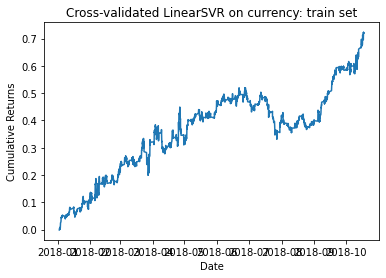

In [58]:
# Train set
# Make "predictions" on training set (in-sample)
positions = np.where(grid_search_LinearSVR.predict(X_train)> 0,1,-1 ) #################

#dailyRet = fAux.backshift(1, positions) * x[:train_set,0] # x[:train_set,0] = ret1
dailyRet = pd.Series(positions).fillna(0).values * retFut1_train
dailyRet = dailyRet.fillna(0)

cumret = np.cumprod(dailyRet + 1) - 1

plt.figure(1)
plt.plot(cumret.index, cumret)
plt.title('Cross-validated LinearSVR on currency: train set')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')


cagr = (1 + cumret[-1]) ** (252 / len(cumret)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret)
ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet)
print (('In-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD))

Financial metrics and equity curves of test set are shown as below:

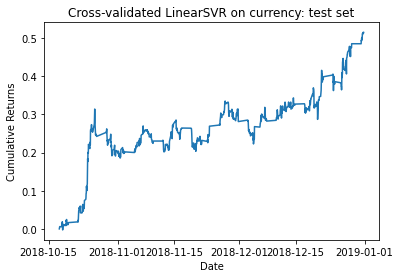

Out-of-sample: CAGR=0.131052 Sharpe ratio=1.33326 maxDD=-0.097679 maxDDD=355 Calmar ratio=1.34166  Rho=0.107173 PVal=0.00176489  MSE=3.64218e-05



In [59]:
# Test set
# Make "predictions" on test set (out-of-sample)

#positions2 = np.where(best_model.predict(x_test.values)> 0,1,-1 )
positions2 = np.where(grid_search_LinearSVR.predict(X_test)> 0,1,-1 ) #################

dailyRet2 = pd.Series(positions2).fillna(0).values * retFut1_test
dailyRet2 = dailyRet2.fillna(0)

cumret2 = np.cumprod(dailyRet2 + 1) - 1

plt.figure(2)
plt.plot(cumret2.index, cumret2)
plt.title('Cross-validated LinearSVR on currency: test set')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.show()
mse = mean_squared_error(Y_test,grid_search_LinearSVR.predict(X_test))
rho, pval = spearmanr(Y_test,grid_search_LinearSVR.predict(X_test)) #spearman's rank correlation: very small but significant
cagr = (1 + cumret2[-1]) ** (252 / len(cumret2)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret2)
ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet2) / np.std(dailyRet2)
print (('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}  Rho={:0.6} PVal={:0.6}  MSE={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, rho, pval, mse))

Residual Distribution plot and Residual Autocorrelation plot are shown as below:

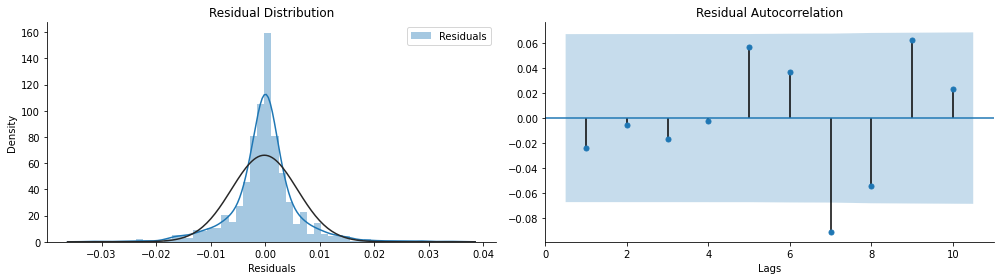

In [60]:
#plot the residuals
true_y = Y_test.values.ravel()
pred_y = grid_search_LinearSVR.predict(X_test)
residuals = np.subtract(true_y, pred_y)
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=10, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout();
plt.show()

Ljung-Box test:

In [61]:
#Residual autocorrelation
#If the p-value of the test is greater than the required significance (>0.05), residuals are independent
lb = sm.stats.acorr_ljungbox(residuals, lags=[10], boxpierce=False)
print("Ljung-Box test p-value", lb[1])

Ljung-Box test p-value [0.05068534]


White reality check and it's results:

average return 0.007389
[-0.00567126  0.00629418]
Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)
p_value:
0.011399999999999966


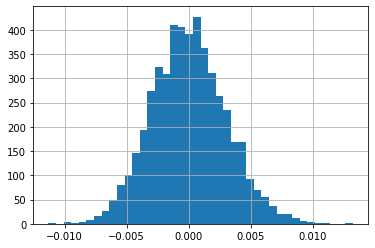

In [62]:
#white reality check
detrended_open = detrendPrice.detrendPrice(msft_price[train_size:len(X)])
detrended_retFut1 = detrended_open.pct_change(periods=1).shift(-1).fillna(0)
detrended_syst_rets = detrended_retFut1 * pd.Series(positions2).fillna(0)
WhiteRealityCheckFor1.bootstrap(detrended_syst_rets)
plt.show()

From the results, we could see that the p-value is very small and suggest pretty good fit of the model.

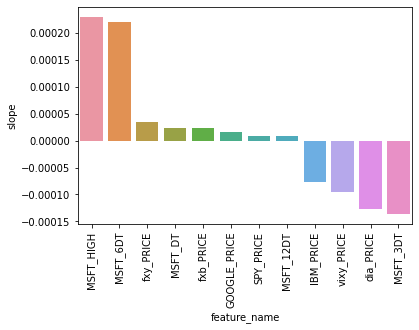

In [63]:
#plot the coefficients
importance = pd.DataFrame(zip(best_model_LinearSVR[2].coef_.ravel().tolist(), X_train.columns.values.tolist()))
importance.columns = ['slope','feature_name']
importance_plot = sns.barplot(x=importance['feature_name'], y=importance['slope'], data=importance,orient='v',dodge=False,order=importance.sort_values('slope',ascending=False).feature_name)
for item in importance_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)
plt.show()

### 6.2 LinearSVC

LinearSVC is defined and tested in this section to compare with the LinearSVR in the previous section.

In [64]:
# redefine Y for LinearSVC
Y[:] = np.where(Y>0,1,-1)
# train test split
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

LinearSVC is defined below:

In [65]:
svc = LinearSVC()
cols = X_train.columns
ix_num = X_train.select_dtypes(exclude=['uint8']).columns
ix_dum = X_train.select_dtypes(include=['uint8']).columns

PCA and scalar are added:

In [66]:
pca=PCA()
scaler = StandardScaler(with_mean=True, with_std=True)
myscorer = None
tscv = TimeSeriesSplit(n_splits=5)

Pipeline is defined:

In [67]:
numerical_ix = X_train.select_dtypes(include=['float64']).columns
t = [('pca', pca, numerical_ix)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')
pipe = Pipeline([('scaler',scaler), ('pca', pca),('svc', svc)])

Grid search is performed:

In [68]:
scales_rs = [{'scale': .5},{'scale': .1}]
c_rs = np.linspace(0.001, 1, num=8, endpoint=True)
ncomponents_rs =   list(range(10,X_test.shape[1]))
param_grid = [{'pca__n_components':ncomponents_rs, 'svc__C': c_rs}]
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True, n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

Best parameters scaling grid: {'pca__n_components': 12, 'svc__C': 0.42914285714285716}
Best cross-validation score scaling grid: 55.24


Financial metrics and equity curves of train set are shown as below:

In-sample: CAGR=0.041849 Sharpe ratio=0.703134 maxDD=-0.107667 maxDDD=845 Calmar ratio=0.388689



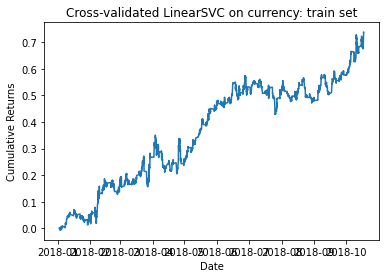

In [69]:
# Train set
# Make "predictions" on training set (in-sample)
positions = np.where(grid_search.predict(X_train)> 0,1,-1 ) #################

#dailyRet = fAux.backshift(1, positions) * x[:train_set,0] # x[:train_set,0] = ret1
dailyRet = pd.Series(positions).fillna(0).values * retFut1_train
dailyRet = dailyRet.fillna(0)

cumret = np.cumprod(dailyRet + 1) - 1

plt.figure(1)
plt.plot(cumret.index, cumret)
plt.title('Cross-validated LinearSVC on currency: train set')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')


cagr = (1 + cumret[-1]) ** (252 / len(cumret)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret)
ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet)
print (('In-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD))

Financial metrics and equity curves of test set are shown as below:

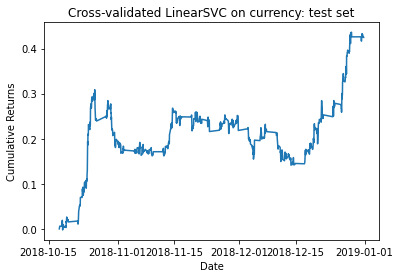

Out-of-sample: CAGR=0.110771 Sharpe ratio=1.14333 maxDD=-0.127992 maxDDD=678 Calmar ratio=0.865459  accuracy_score=0.542992



In [70]:
# Test set
# Make "predictions" on test set (out-of-sample)

#positions2 = np.where(best_model.predict(x_test.values)> 0,1,-1 )
positions2 = np.where(grid_search.predict(X_test)> 0,1,-1 ) #################

dailyRet2 = pd.Series(positions2).fillna(0).values * retFut1_test
dailyRet2 = dailyRet2.fillna(0)

cumret2 = np.cumprod(dailyRet2 + 1) - 1

plt.figure(2)
plt.plot(cumret2.index, cumret2)
plt.title('Cross-validated LinearSVC on currency: test set')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.show()

#metrics
accuracy = accuracy_score(Y_test.values.ravel(), grid_search.predict(X_test.values))

rho, pval = spearmanr(Y_test,grid_search.predict(X_test)) #spearman's rank correlation: very small but significant

cagr = (1 + cumret2[-1]) ** (252 / len(cumret2)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret2)
ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet2) / np.std(dailyRet2)
print (('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}  accuracy_score={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, accuracy))


Plot the significance of correlation matrix:

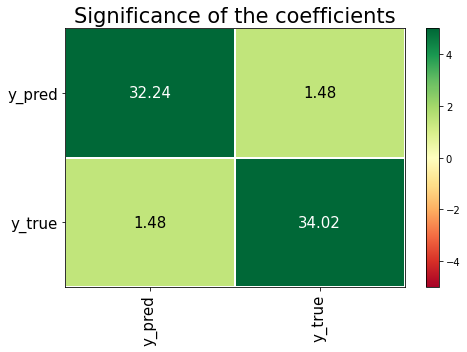

In [71]:
#If this figure does not plot correctly, select the lines and press F9 again
arr1 = Y_test.values.ravel()
arr2 = grid_search.predict(X_test.values)
dfc = pd.DataFrame({'y_true': arr1, 'y_pred': arr2})
phi_k_corr = dfc.phik_matrix(interval_cols=[]).iloc[1,0]
significance_overview = dfc.significance_matrix(interval_cols=[])
phi_k_sig  = dfc.significance_matrix(interval_cols=[]).iloc[1,0]
phi_k_p_val = 1 - ndtr(phi_k_sig) 
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(7, 5))
plt.tight_layout()
plt.show()

Residual Distribution and Residual Autocorrelation plots:

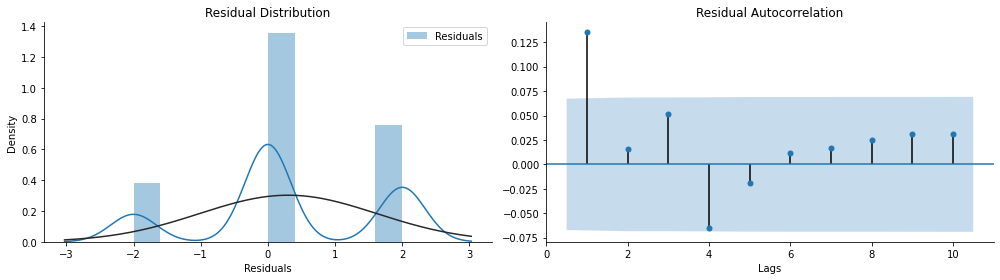

In [72]:
#plot the residuals
true_y = Y_test.values.ravel()
pred_y = grid_search.predict(X_test)
residuals = np.subtract(true_y, pred_y)
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=10, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout();
plt.show()

Ljung-Box test:

In [73]:
#Residual autocorrelation
#If the p-value of the test is greater than the required significance (>0.05), residuals are independent
lb = sm.stats.acorr_ljungbox(residuals, lags=[10], boxpierce=False)
print("Ljung-Box test p-value", lb[1])

Ljung-Box test p-value [0.00627459]


White reality check and its results:

average return 0.005980
[-0.00580374  0.00615183]
Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)
p_value:
0.028200000000000003


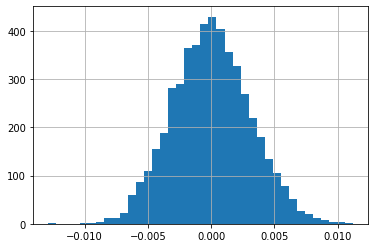

In [74]:
#white reality check
detrended_open = detrendPrice.detrendPrice(msft_price[train_size:len(X)])
detrended_retFut1 = detrended_open.pct_change(periods=1).shift(-1).fillna(0)
detrended_syst_rets = detrended_retFut1 * pd.Series(positions2).fillna(0)
WhiteRealityCheckFor1.bootstrap(detrended_syst_rets)
plt.show()

According to the White reality check p-value, it is quite small but is larger than that of LinearSVR, so we might prefer LinearSVR.

Plot the coefficients:

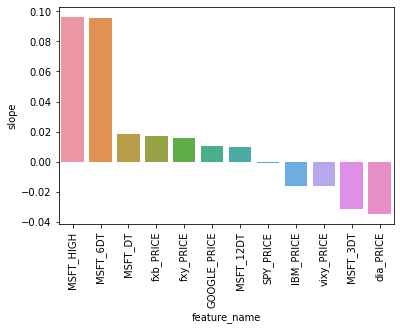

In [75]:
#plot the coefficients
importance = pd.DataFrame(zip(best_model[2].coef_.ravel().tolist(), X_train.columns.values.tolist()))
importance.columns = ['slope','feature_name']
importance_plot = sns.barplot(x=importance['feature_name'], y=importance['slope'], data=importance,orient='v',dodge=False,order=importance.sort_values('slope',ascending=False).feature_name)
for item in importance_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)
plt.show()

### 6.3 LinearSVC with wavelets

In the previous sections, we've compared LinearSVR with LinearSVC and found that LinearSVR might be a better model to choose. In this section, comparison is made by adding wavelets to LinearSVC to see whether this is useful.

In [76]:
# define wavelets
def wavelet_smoother(X_train, scale=None):
    
        wavelet = "db6"
        df_wavelets = X_train.copy()
        
        for i in X_train.columns:
            signal = X_train[i]
            coefficients = pywt.wavedec(signal, wavelet, mode='per')
            coefficients[1:] = [pywt.threshold(i, value=scale*signal.max(), mode='soft') for i in coefficients[1:]]
            reconstructed_signal = pywt.waverec(coefficients, wavelet, mode='per')
            df_wavelets[i] = reconstructed_signal
        
        df_wavelets = df_wavelets.fillna(0)
        return df_wavelets

Apply wavelets, pca and scaler:

In [77]:
X_train[:] = wavelet_smoother(X_train,scale=0.1)
pca=PCA()
scaler = StandardScaler(with_mean=True, with_std=True)
myscorer = None
tscv = TimeSeriesSplit(n_splits=5)

Pipeline and grid search:

In [78]:
numerical_ix = X_train.select_dtypes(include=['float64']).columns
t = [('pca', pca, numerical_ix)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')
pipe = Pipeline([('scaler',scaler), ('pca', pca),('svc', svc)])
scales_rs = [{'scale': .5},{'scale': .1}]
c_rs = np.linspace(0.001, 1, num=8, endpoint=True)
ncomponents_rs = list(range(10,X_test.shape[1]))
param_grid = [{'pca__n_components':ncomponents_rs, 'svc__C': c_rs}]
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring=myscorer, return_train_score=True, n_jobs = -1)
grid_search.fit(X_train, Y_train)
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best cross-validation score scaling grid: {:.2f}".format(grid_search.best_score_*100))
results = pd.DataFrame(grid_search.cv_results_)

Best parameters scaling grid: {'pca__n_components': 12, 'svc__C': 0.1437142857142857}
Best cross-validation score scaling grid: 54.50


Financial metrics and equity curves of train set are shown as below:

In-sample: CAGR=0.0694158 Sharpe ratio=1.1333 maxDD=-0.0872723 maxDDD=352 Calmar ratio=0.795393



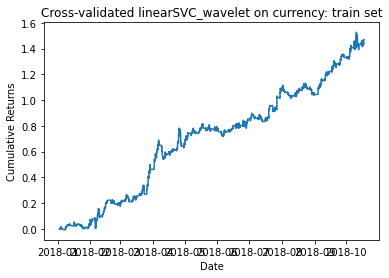

In [79]:
# Train set
# Make "predictions" on training set (in-sample)
positions = np.where(grid_search.predict(X_train)> 0,1,-1 ) #################

#dailyRet = fAux.backshift(1, positions) * x[:train_set,0] # x[:train_set,0] = ret1
dailyRet = pd.Series(positions).fillna(0).values * retFut1_train
dailyRet = dailyRet.fillna(0)

cumret = np.cumprod(dailyRet + 1) - 1

plt.figure(1)
plt.plot(cumret.index, cumret)
plt.title('Cross-validated linearSVC_wavelet on currency: train set')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')


cagr = (1 + cumret[-1]) ** (252 / len(cumret)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret)
ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet) / np.std(dailyRet)
print (('In-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD))

Financial metrics and equity curves of test set are shown as below:

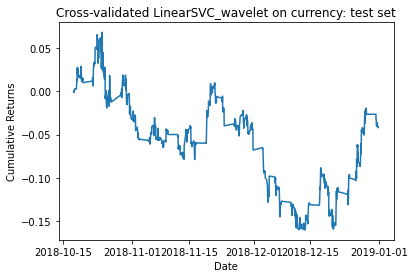

Out-of-sample: CAGR=-0.0126269 Sharpe ratio=-0.0840197 maxDD=-0.213068 maxDDD=764 Calmar ratio=-0.0592622  accuracy_score=0.504122



In [88]:
# Test set
# Make "predictions" on test set (out-of-sample)

#positions2 = np.where(best_model.predict(x_test.values)> 0,1,-1 )
positions2 = np.where(grid_search.predict(X_test)> 0,1,-1 ) #################

dailyRet2 = pd.Series(positions2).fillna(0).values * retFut1_test
dailyRet2 = dailyRet2.fillna(0)

cumret2 = np.cumprod(dailyRet2 + 1) - 1

plt.figure(2)
plt.plot(cumret2.index, cumret2)
plt.title('Cross-validated LinearSVC_wavelet on currency: test set')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.show()

#metrics
accuracy = accuracy_score(Y_test, grid_search.predict(X_test))

rho, pval = spearmanr(Y_test,grid_search.predict(X_test)) #spearman's rank correlation: very small but significant

cagr = (1 + cumret2[-1]) ** (252 / len(cumret2)) - 1
maxDD, maxDDD = fAux.calculateMaxDD(cumret2)
ratio = (252.0 ** (1.0/2.0)) * np.mean(dailyRet2) / np.std(dailyRet2)
print (('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}  accuracy_score={:0.6}\n'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD, accuracy))

Significance of coefficients matrix:

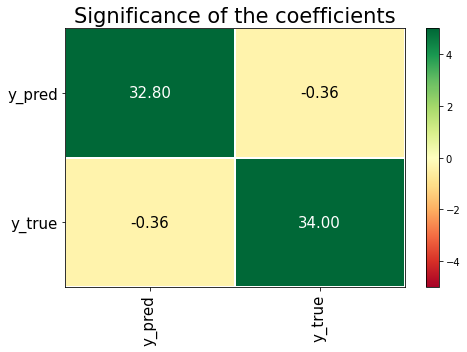

In [90]:
#If this figure does not plot correctly select the lines and press F9 again
arr1 = Y_test.values.ravel()
arr2 = grid_search.predict(X_test.values)
dfc = pd.DataFrame({'y_true': arr1, 'y_pred': arr2})
phi_k_corr = dfc.phik_matrix(interval_cols=[]).iloc[1,0]
significance_overview = dfc.significance_matrix(interval_cols=[])
phi_k_sig  = dfc.significance_matrix(interval_cols=[]).iloc[1,0]
phi_k_p_val = 1 - ndtr(phi_k_sig) 
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(7, 5))
plt.tight_layout()
plt.show()

Residual Distribution and Residual Autocorrelation plot:

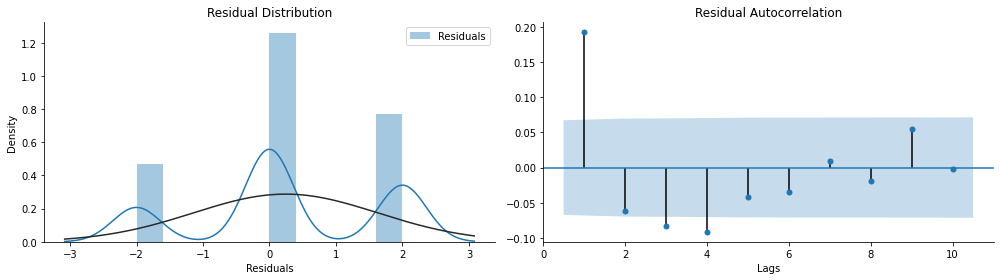

In [91]:
#plot the residuals
true_y = Y_test.values.ravel()
pred_y = grid_search.predict(X_test)
residuals = np.subtract(true_y, pred_y)

from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=10, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout();
plt.show()

Ljung-Box test:

In [92]:
#Residual autocorrelation
#If the p-value of the test is greater than the required significance (>0.05), residuals are independent
lb = sm.stats.acorr_ljungbox(residuals, lags=[10], boxpierce=False)
print("Ljung-Box test p-value", lb[1])

Ljung-Box test p-value [6.59969989e-08]


White reality check:

average return 0.000508
[-0.00579911  0.00615807]
Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)
p_value:
0.43100000000000005


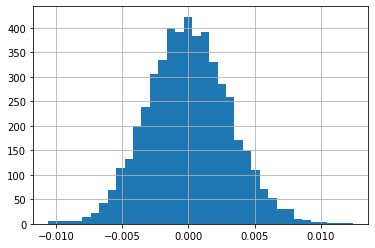

In [93]:
#white reality check
detrended_open = detrendPrice.detrendPrice(msft_price[train_size:len(X)])
detrended_retFut1 = detrended_open.pct_change(periods=1).shift(-1).fillna(0)
detrended_syst_rets = detrended_retFut1 * pd.Series(positions2).fillna(0)
WhiteRealityCheckFor1.bootstrap(detrended_syst_rets)
plt.show()

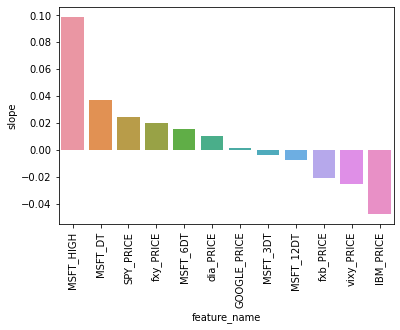

In [94]:
#plot the coefficients
importance = pd.DataFrame(zip(best_model[2].coef_.ravel().tolist(), X_train.columns.values.tolist()))
importance.columns = ['slope','feature_name']
importance_plot = sns.barplot(x=importance['feature_name'], y=importance['slope'], data=importance,orient='v',dodge=False,order=importance.sort_values('slope',ascending=False).feature_name)
for item in importance_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)
plt.show()

## 7.0 Results

From the results above, we can conclude that linear SVMs are promising modeling approaches for stock price prediction problems, and LinearSVR outperforms LinearSVC in this case. Also, we found that wavelets did not improve the performance of our linearSVC model. Therefore, we should not apply waveltes to our LinearSVMs model and finalize our best model as LinearSVR(C=0.0001, epsilon=0) with StandardScaler and PCA(n_components=12) applied.